<a href="https://colab.research.google.com/github/rvthe-elegant/deep_learning/blob/Assignment_6/DL_ASSIGN6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **20MAI0038**

## **Rahul Laxman Vasanad**

## **Implementation of AutoEncoder Decoder**

## **1. Building Simple Auto Encoder**

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
#Compiling Auto Encoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## **2. Loading the mnist data**

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## **3. Training the model**

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.3894 - val_loss: 0.1875
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1755 - val_loss: 0.1508
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1472 - val_loss: 0.1332
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1311 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1198 - val_loss: 0.1122
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1123 - val_loss: 0.1062
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1064 - val_loss: 0.1022
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1025 - val_loss: 0.0990
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0996 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0977 - val_loss: 0.0953

After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations.

In [9]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

## **4. Reconstructiong the images with the comaprision of original images**

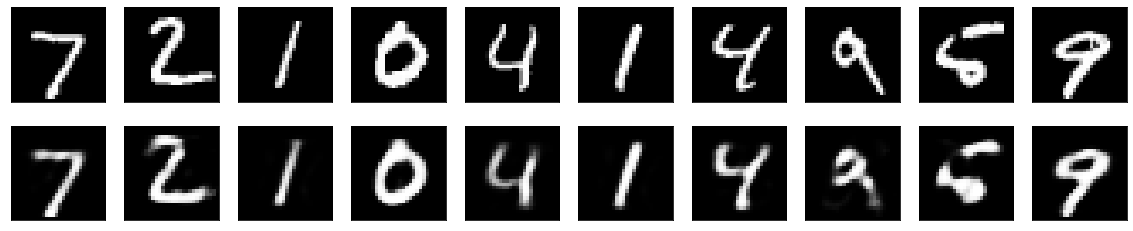

In [10]:

import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The top row is the original digits, and the bottom row is the reconstructed digits.

## **Deep AutoEncoder**

In [11]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [12]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3462 - val_loss: 0.1684
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1602 - val_loss: 0.1395
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1372 - val_loss: 0.1275
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1252 - val_loss: 0.1179
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1177 - val_loss: 0.1131
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1137 - val_loss: 0.1092
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1100 - val_loss: 0.1066
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1073 - val_loss: 0.1043
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1051 - val_loss: 0.1025
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1032 - val_lo

In [13]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

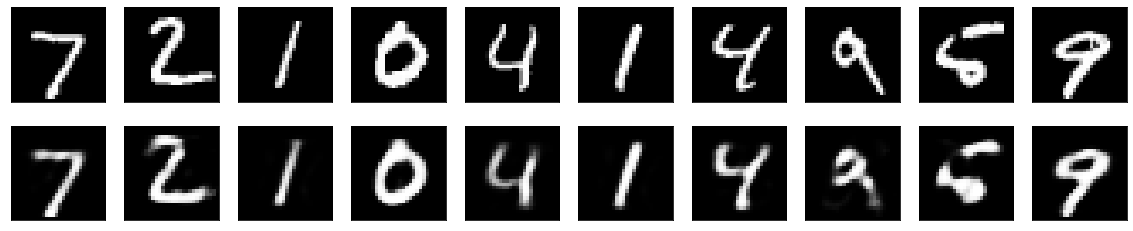

In [14]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()